<a href="https://colab.research.google.com/github/hossein20s/AnExample/blob/master/Regression_on_structured_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget bit.ly/initnotebook -O init.ipynb
%run init.ipynb

--2019-06-24 19:27:43--  http://bit.ly/initnotebook
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/hossein20s/notebook_snippets/master/InitializeNotebook.ipynb [following]
--2019-06-24 19:27:44--  https://raw.githubusercontent.com/hossein20s/notebook_snippets/master/InitializeNotebook.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2560 (2.5K) [text/plain]
Saving to: ‘init.ipynb’

init.ipynb          100%[===================>]   2.50K  --.-KB/s    in 0s      

2019-06-24 19:27:44 (35.6 MB/s) - ‘init.ipynb’ saved [2560/2560]

Go to this URL in a browser: https://accounts.google.com/

Using TensorFlow backend.


save and load models from yaml and json files defined. Everything stored in folder  <built-in function dir>
save and load models from yaml and json files defined. Everything stored in folder  <built-in function dir>


In [0]:
DATA_FILE = 'data/CHSI/chsi.csv'
label_column = 'All_Death'
logistic_column = 'Death_Flag'
exclude_term = 'Death'

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv(DATA_FILE)
print(df.shape)


(3141, 527)


In [124]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from numpy.core.defchararray import split

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
transformedArray = imp.fit_transform(df)
dataframe = pd.DataFrame(transformedArray, index=df.index, columns=df.columns)

def splitTimeColumn(df, column_name):
  column = dataframe[column_name]
  splited = [element.split('-') for element in column]
  splited2columns = np.asarray(splited).astype(int).reshape(-1, 2)
  df.drop([column_name], axis=1, inplace=True)
  df[column_name + '_Start'] = splited2columns[:,0]
  df[column_name + '_End'] = splited2columns[:,1]
  #print(column_name, dataframe[column_name + '_Start'])

splitTimeColumn(dataframe, 'LCD_Time_Span')
splitTimeColumn(dataframe, 'ID_Time_Span')
splitTimeColumn(dataframe, 'MOBD_Time_Span')
splitTimeColumn(dataframe, 'EH_Time_Span')

def createBinaryColumn(df, column_name, label_column):
  array = df[column_name]
  binaryValues = (array > np.mean(array)).astype(int)
  df[label_column] = binaryValues

createBinaryColumn(dataframe, label_column, logistic_column)

#exclude all columns that may cause overfitting
#dataframe.filter(like=exclude_term)
excluded_columns = [column for column in dataframe.columns if exclude_term in column ]
print(len(excluded_columns))
print(dataframe.shape)
def removeIfIs(theList, item):
  if item in theList: theList.remove(item)
removeIfIs(excluded_columns, label_column)
print(len(excluded_columns))
removeIfIs(excluded_columns, logistic_column)
print(len(excluded_columns))
dataframe.drop(excluded_columns, axis=1, inplace=True)
print(dataframe.shape)
#LabelEncoder().fit_transform(dataframe)

dataframe.isnull().values.any()


7
(3141, 532)
6
5
(3141, 527)


False

In [0]:
from sklearn.model_selection import train_test_split

feature_train, label_train, feature_test, label_test = train_test_split(
    dataframe.drop(columns=[label_column, logistic_column], axis=1), 
    dataframe[logistic_column],
    test_size=0.33, random_state=120)


# Model Selection

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Logistic Regression

In [127]:
model.fit(feature_train, feature_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted = model.predict(label_train)

In [129]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

scores = accuracy_score(label_test, predicted)
print('Accuracy Score: ', scores)
report = classification_report(label_test, predicted)
print(report)
confusion = confusion_matrix(label_test, predicted)
print(confusion)

Accuracy Score:  0.8572806171648988
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       518
           1       0.88      0.82      0.85       519

    accuracy                           0.86      1037
   macro avg       0.86      0.86      0.86      1037
weighted avg       0.86      0.86      0.86      1037

[[461  57]
 [ 91 428]]


# Regression via Random Forest

In [0]:
feature_train, label_train, feature_test, label_test = train_test_split(
    dataframe.drop(columns=[label_column], axis=1), 
    dataframe[label_column],
    test_size=0.33, random_state=120)

In [131]:
from modelutil import runRandomForestRegressor

accuracy, predicted, model = runRandomForestRegressor(feature_train, feature_test)

Y.shape should be (X,):  (2104,)


Accuracy MSE:  621.9944236548022
(2104,)
(2104,)


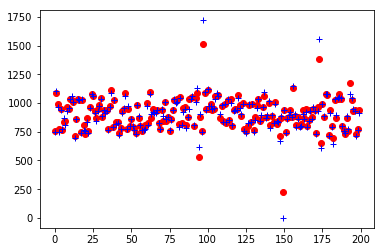

In [138]:
import matplotlib.pyplot as plt

print('Accuracy MSE: ', accuracy)

print(predicted.shape)
print(feature_test.shape)

min=300
max=500

plt.plot(predicted[min:max], 'ro')
plt.plot(feature_test.values[min:max], 'b+')
plt.show()

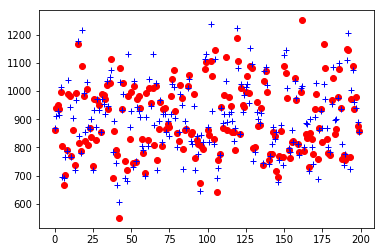

In [139]:
predicted_test = model.predict(label_train)

plt.plot(predicted_test[min:max], 'ro')
plt.plot(label_test.values[min:max], 'b+')